In [1]:
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math

#Download dos dados de preço das ações Itau Unibanco com ticker "ITUB4"
df_ITUB4 = yf.download('ITUB4.SA', start="2016-01-01", end="2024-03-31")
#Gerando um novo dataset reduzido, apenas com Data(index), alta e baixa
df_reduced = df_ITUB4[['High', 'Low']]

[*********************100%%**********************]  1 of 1 completed


In [2]:
#Ordenando valores por data
df_reduced = df_reduced.sort_values(by='Date')
#Calculando a média entre alta e baixa e atribuindo a coluna median
df_reduced['Median'] = df_reduced.mean(axis=1)


<function matplotlib.pyplot.show(close=None, block=None)>

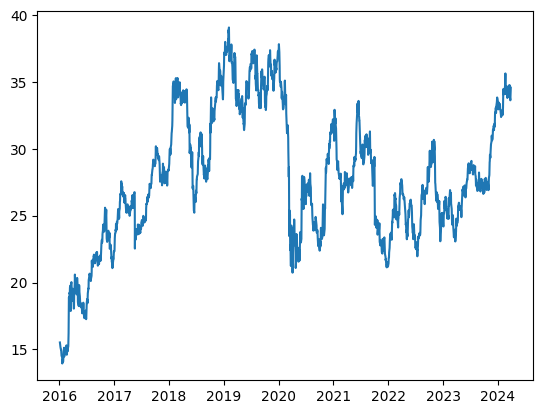

In [3]:
#Gerando gráfico da média de preços da ação
plt.plot(df_reduced['Median'])
plt.show

In [4]:
#Vamos padronizar as médias de valor do ticker
norm = MinMaxScaler(feature_range=(0,1))
normalized = df_reduced.iloc[:, 2:3]
df_reduced['Stand']= norm.fit_transform(normalized.values)

In [5]:
#Retirar eventuais valores nulos
df_reduced = df_reduced.dropna()
#Selecionando a base de treinamento em 80% das observações
df_training = df_reduced['Stand'].iloc[0:math.ceil(len(df_reduced) * 0.8)]
#Selecionando a base de testes
df_testing = df_reduced['Stand'].iloc[math.ceil(len(df_reduced) * 0.8):len(df_reduced)]